In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
df = pd.read_csv('BKB_WaterQualityData_2020084.csv')
print(df)

     Site_Id Unit_Id   Read_Date  Salinity (ppt)  Dissolved Oxygen (mg/L)  \
0        Bay     NaN    1/3/1994             1.3                     11.7   
1        Bay     NaN   1/31/1994             1.5                     12.0   
2        Bay     NaN    2/7/1994             1.0                     10.5   
3        Bay     NaN   2/23/1994             1.0                     10.1   
4        Bay     NaN   2/28/1994             1.0                     12.6   
...      ...     ...         ...             ...                      ...   
2366     Bay     NaN  10/11/2018             1.9                      5.0   
2367     Bay     NaN  10/24/2018             0.0                      9.0   
2368     Bay     NaN  10/28/2018             0.9                      2.9   
2369     Bay     NaN   11/7/2018             1.7                      NaN   
2370     Bay     NaN  12/11/2018             0.1                      NaN   

      pH (standard units)  Secchi Depth (m)  Water Depth (m)  Water Temp (?

In [2]:
#DATA CLEANING

#Remove qualitative data that is not necessary
labels = ['WhoVerified', 'Field_Tech', 'DateVerified', 'Time (24:00)', 'Unit_Id', 'Air Temp-Celsius', 'Air Temp (?F)']
df.drop(columns=labels)

,Site_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),AirTemp (C),Year
0,Bay,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.000000,1994
1,Bay,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.600000,1994
2,Bay,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.600000,1994
3,Bay,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.700000,1994
4,Bay,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.000000,1994
...,...,...,...,...,...,...,...,...,...,...
2366,Bay,10/11/2018,1.9,5.0,7.0,4.00,1.20,25.0,25.555556,2018
2367,Bay,10/24/2018,0.0,9.0,7.0,0.30,0.60,18.0,14.444444,2018
2368,Bay,10/28/2018,0.9,2.9,7.0,0.40,0.90,13.0,9.444444,2018
2369,Bay,11/7/2018,1.7,NaN,7.0,0.45,0.90,20.0,18.333333,2018


In [3]:
#Change wrong Site_Id name

def site_change(x):
    if x == 'd':
        x = 'D'
    return x
        
new_site_id = df["Site_Id"].apply(site_change)
df["Site_Id"] = new_site_id

In [4]:
#Correlation Matrix
numeric_columns = df.select_dtypes(include='float64')
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                         Salinity (ppt)  Dissolved Oxygen (mg/L)  \
Salinity (ppt)                 1.000000                 0.303047   
Dissolved Oxygen (mg/L)        0.303047                 1.000000   
pH (standard units)            0.296075                 0.055909   
Secchi Depth (m)              -0.151049                -0.057495   
Water Depth (m)               -0.085821                -0.005458   
Water Temp (?C)               -0.008516                -0.512998   
Air Temp-Celsius               0.134432                -0.333206   
Air Temp (?F)                  0.078265                -0.438824   
AirTemp (C)                    0.046787                -0.302599   

                         pH (standard units)  Secchi Depth (m)  \
Salinity (ppt)                      0.296075         -0.151049   
Dissolved Oxygen (mg/L)             0.055909         -0.057495   
pH (standard units)                 1.000000         -0.149136   
Secchi Depth (m)                   -0.149136          1

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


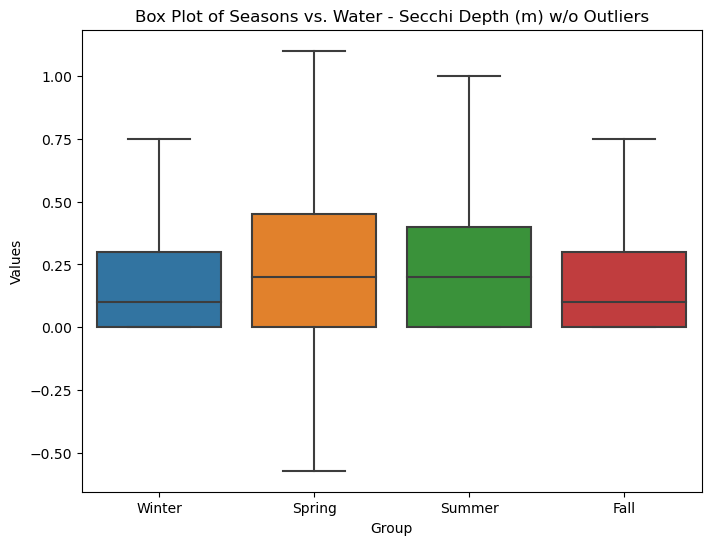

            mean     sum  count   min  max
Season                                    
Fall    0.207980  124.58    599 -2.80  3.0
Spring  0.289175  168.30    582 -0.57  7.9
Summer  0.263769  153.25    581 -0.70  3.8
Winter  0.183396   97.75    533 -0.55  1.8


In [5]:
#Conjecture #2: Temporal Dynamics of Water Potability
#Conduct a time-series analysis of the dataset to observe how water potability can change over time
#Secchi Depth = Turbidity = Water Potability

#Change date into something readable by python
df['Read_Date'] = pd.to_datetime(df['Read_Date'])

#Set X and y values
X = df['Read_Date']
y = df['Water Depth (m)'] - df['Secchi Depth (m)']
df ['Water - Secchi (m)'] = df['Water Depth (m)'] - df['Secchi Depth (m)']

# Extracting month from the 'date' column
df['Month'] = df['Read_Date'].dt.month
df['Year'] = df['Read_Date'].dt.year

# Defining a function to map months to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Applying the function to create a 'season' column
df['Season'] = df['Month'].apply(get_season)

szn = df[['Water - Secchi (m)', 'Season']]

# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Water - Secchi (m)', data=szn, showfliers=False)

# Adding labels and title
plt.title('Box Plot of Seasons vs. Water - Secchi Depth (m) w/o Outliers')
plt.xlabel('Group')
plt.ylabel('Values')

# Show the plot
plt.show()

#Summary Statistics
# Group by 'Category' and calculate multiple summary statistics for 'Values'
grouped_summary = df.groupby('Season')['Water - Secchi (m)'].agg(['mean', 'sum', 'count', 'min', 'max'])

# Display the grouped summary statistics
print(grouped_summary)

In [6]:
#Classification of Season based on Water Depth - Secchi Depth (m)

#Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Change Season to numerical values
def szn_to_num(x):
    if x == 'Winter':
        x = 0
        return x
    if x == 'Spring':
        x = 1
        return x
    if x == 'Summer':
        x = 2
        return x
    if x == 'Fall':
        x = 3
        return x
        
new_szn = df['Season'].apply(szn_to_num)
df['Season'] = new_szn

#Drop NA values in Water - Secchi (m)
data = df.dropna(subset=['Water - Secchi (m)'])

#Set X and y values
X = data['Water - Secchi (m)'].values.reshape(-1, 1)
y = data['Season']

#Split data into training and test sets; 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

new_data = data.groupby(['Site_Id'])

#Part A - Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)
logistic_regression_accuracy = metrics.accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

#Part B - KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

#Part C - Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = metrics.accuracy_score(y_test, random_forest_pred)
print("Random Forest Accuracy:", random_forest_accuracy)

Logistic Regression Accuracy: 0.26143790849673204
KNN Accuracy: 0.21350762527233116
Random Forest Accuracy: 0.22440087145969498


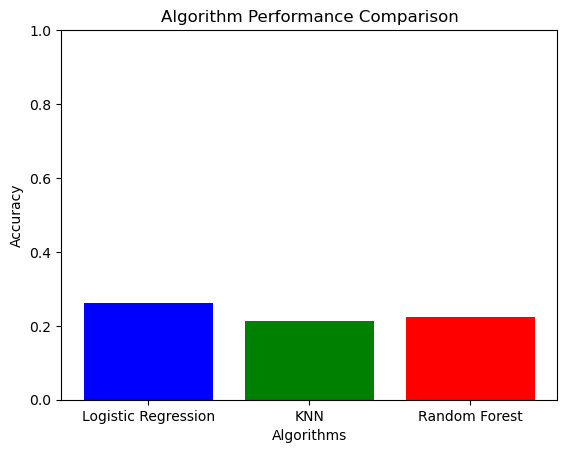

In [8]:
#Problem 5
#Show the performance of the algorithms using a visualization method of your choice
algorithms = ['Logistic Regression', 'KNN', 'Random Forest']
accuracies = [logistic_regression_accuracy, knn_accuracy, random_forest_accuracy]

#Generate a bar graph to display the accuracy scores
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red'])
plt.title('Algorithm Performance Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()